<a href="https://colab.research.google.com/github/SambhramShetty2003/MachineLearing2024/blob/main/Student_Performance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library Import

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname,filename))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/Student_performance_data _.csv')

#EDA(Exploratory Data Analysis)

In [ ]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
df.tail()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0
2391,3392,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [ ]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [ ]:
df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

#Data Cleaning

In [ ]:
df.duplicated().sum()

0

In [ ]:
numerical_list=[col for col in df.columns if df[col].nunique()>5]
print('Numerical Columns: ', numerical_list)

categorical_list=df.columns.difference(numerical_list).difference(['GradeClass']).to_list()
print('Categorical Columns: ', categorical_list)

Numerical Columns:  ['StudentID', 'StudyTimeWeekly', 'Absences', 'GPA']
Categorical Columns:  ['Age', 'Ethnicity', 'Extracurricular', 'Gender', 'Music', 'ParentalEducation', 'ParentalSupport', 'Sports', 'Tutoring', 'Volunteering']


#Feauture Engineering

Univatriate Analysis

In [ ]:
for columns in categorical_list :
  val_count=df[columns].value_counts()
  print(val_count)

Age
15    630
16    593
17    587
18    582
Name: count, dtype: int64
Ethnicity
0    1207
1     493
2     470
3     222
Name: count, dtype: int64
Extracurricular
0    1475
1     917
Name: count, dtype: int64
Gender
1    1222
0    1170
Name: count, dtype: int64
Music
0    1921
1     471
Name: count, dtype: int64
ParentalEducation
2    934
1    728
3    367
0    243
4    120
Name: count, dtype: int64
ParentalSupport
2    740
3    697
1    489
4    254
0    212
Name: count, dtype: int64
Sports
0    1666
1     726
Name: count, dtype: int64
Tutoring
0    1671
1     721
Name: count, dtype: int64
Volunteering
0    2016
1     376
Name: count, dtype: int64


In [ ]:
labels={'Age':[15,16,17,18],
        'Ethnicity':['Caucasian', 'African American', 'Asian', 'Others'],
        'Extracurricular':['No','Yes'],
        'Gender':['No','Yes'],
        'Music':['No','Yes'],
        'ParentalEducation':['None', 'High School', 'Some College', "Bachelor's", 'Higher Degree'],
        'ParentalSupport':['Low','Moderate','Good', 'Very Good', 'Excellent'],
        'Sports':['No','Yes'],
        'Tutoring':['No','Yes'],
        'Volunteering':['No','Yes'],
        }

<ipython-input-34-90758b199f74>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=columns, palette='pastel')


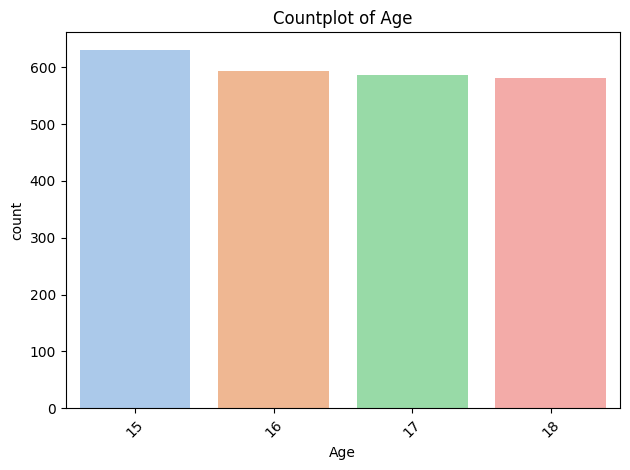

<ipython-input-34-90758b199f74>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=columns, palette='pastel')


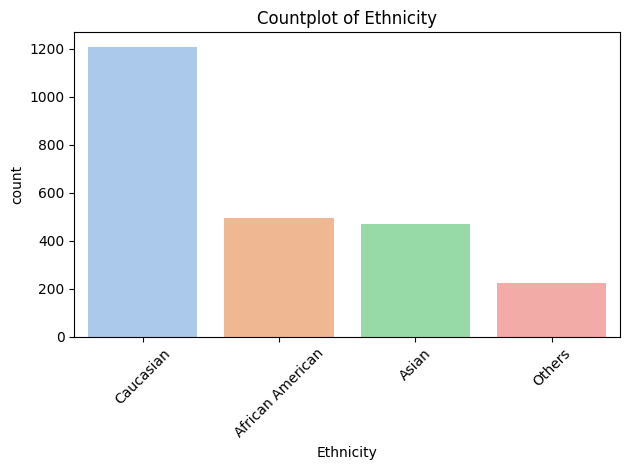

<ipython-input-34-90758b199f74>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=columns, palette='pastel')


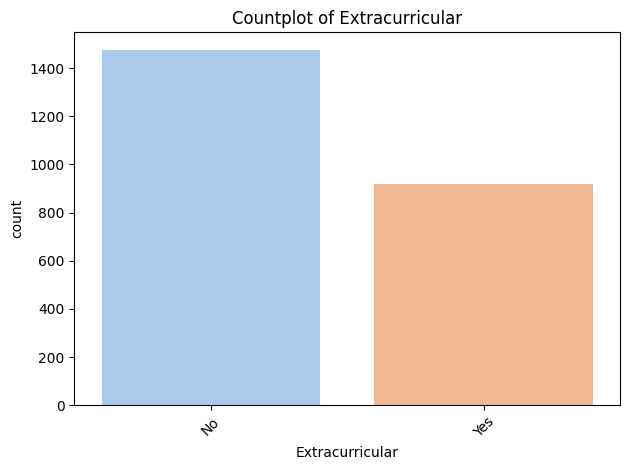

<ipython-input-34-90758b199f74>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=columns, palette='pastel')


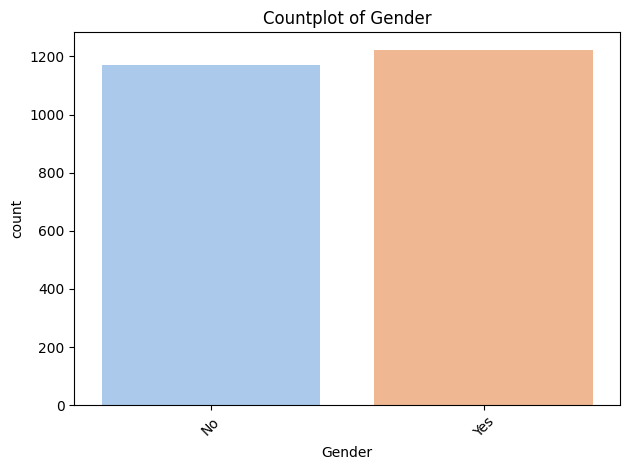

<ipython-input-34-90758b199f74>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=columns, palette='pastel')


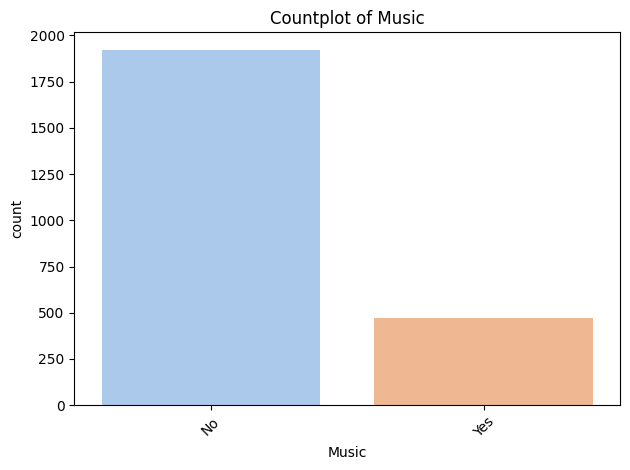

<ipython-input-34-90758b199f74>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=columns, palette='pastel')


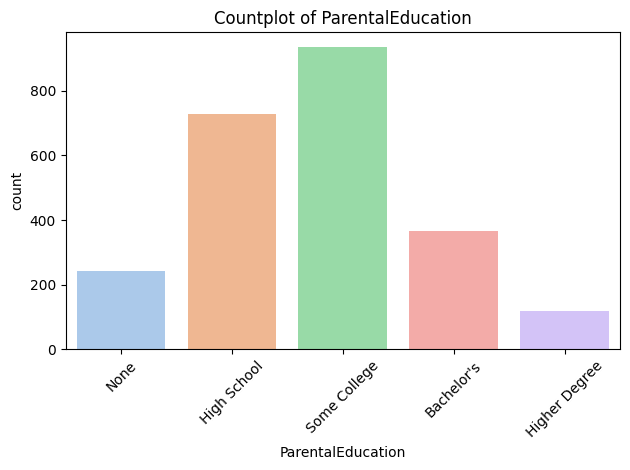

<ipython-input-34-90758b199f74>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=columns, palette='pastel')


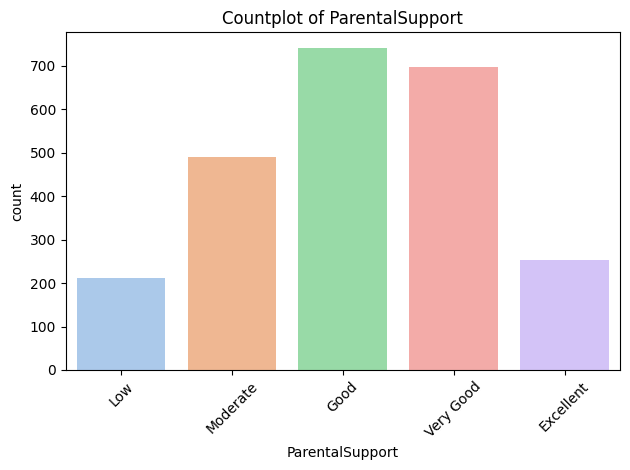

<ipython-input-34-90758b199f74>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=columns, palette='pastel')


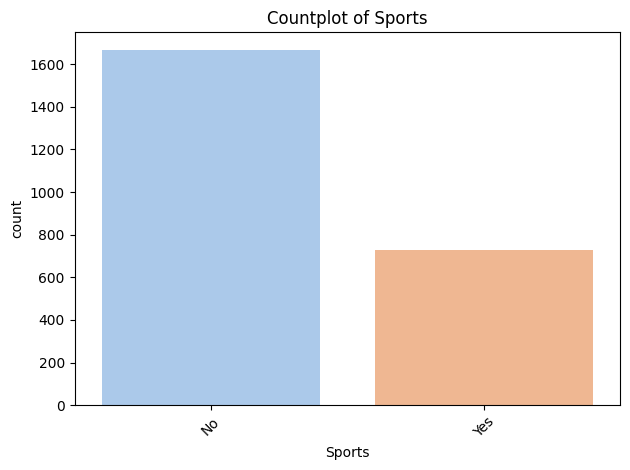

<ipython-input-34-90758b199f74>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=columns, palette='pastel')


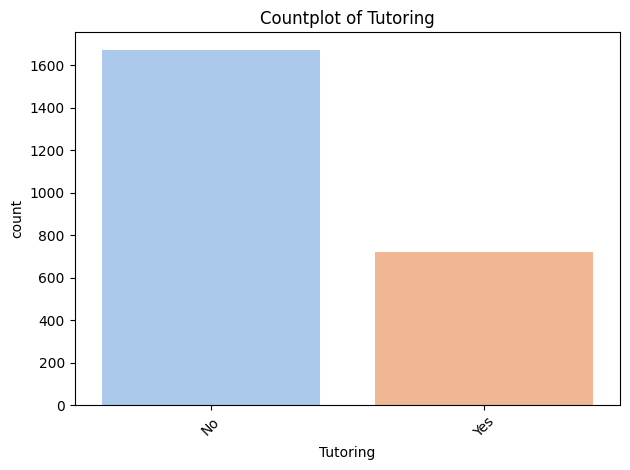

<ipython-input-34-90758b199f74>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=columns, palette='pastel')


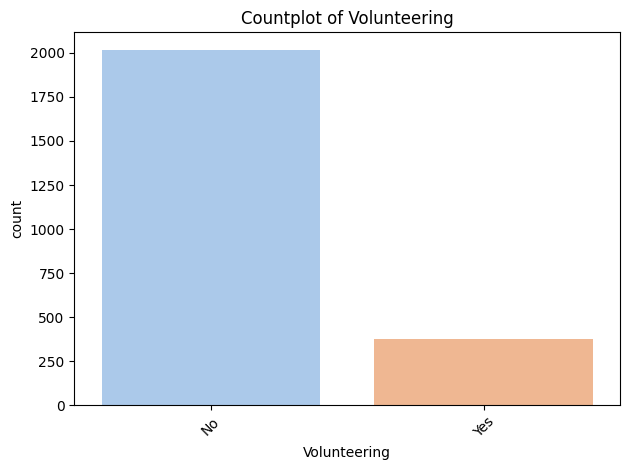

In [ ]:
#countplots for categorical data
for columns in categorical_list:
  sns.countplot(data=df, x=columns, palette='pastel')
  plt.title(f'Countplot of {columns}')

  label=labels[columns]
  ticks=range(len(label))
  plt.xticks(ticks=ticks, labels=label, rotation=45)

  plt.tight_layout()
  plt.show()

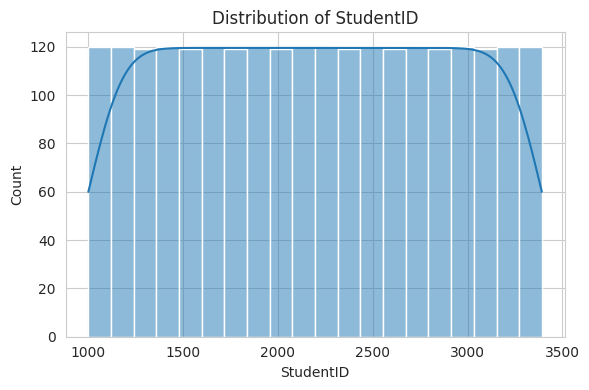

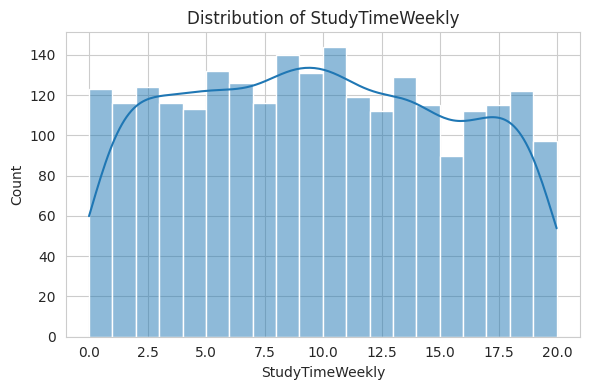

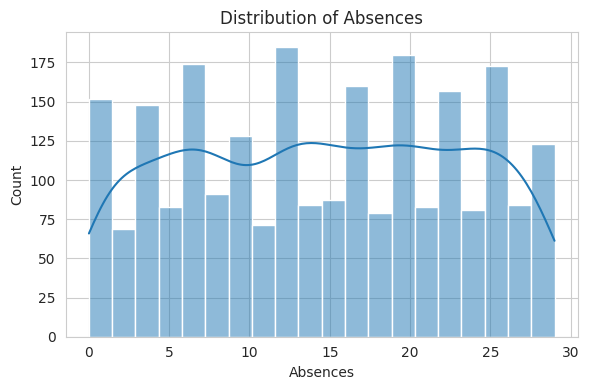

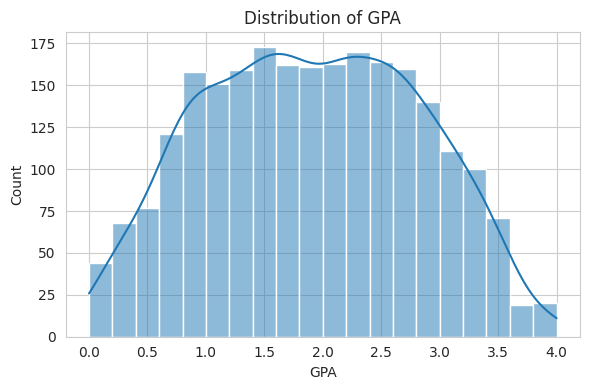

In [ ]:
#Histogram for numerical data
for columns in numerical_list:
  plt.figure(figsize=(6,4))
  sns.set_style(style='whitegrid')
  sns.histplot(data=df, x=columns, kde=True, bins=20)
  plt.title(f'Distribution of {columns}')
  plt.tight_layout()
  plt.show()

Bivariate Analysis

<ipython-input-17-cac010f0cc51>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='ParentalEducation', y='GPA', ax=ax[0], palette='pastel')
<ipython-input-17-cac010f0cc51>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='ParentalEducation', y='GPA', ax=ax[1],palette='pastel')
<ipython-input-17-cac010f0cc51>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ParentalEducation', y='GPA', ax=ax[2],palette='pastel')


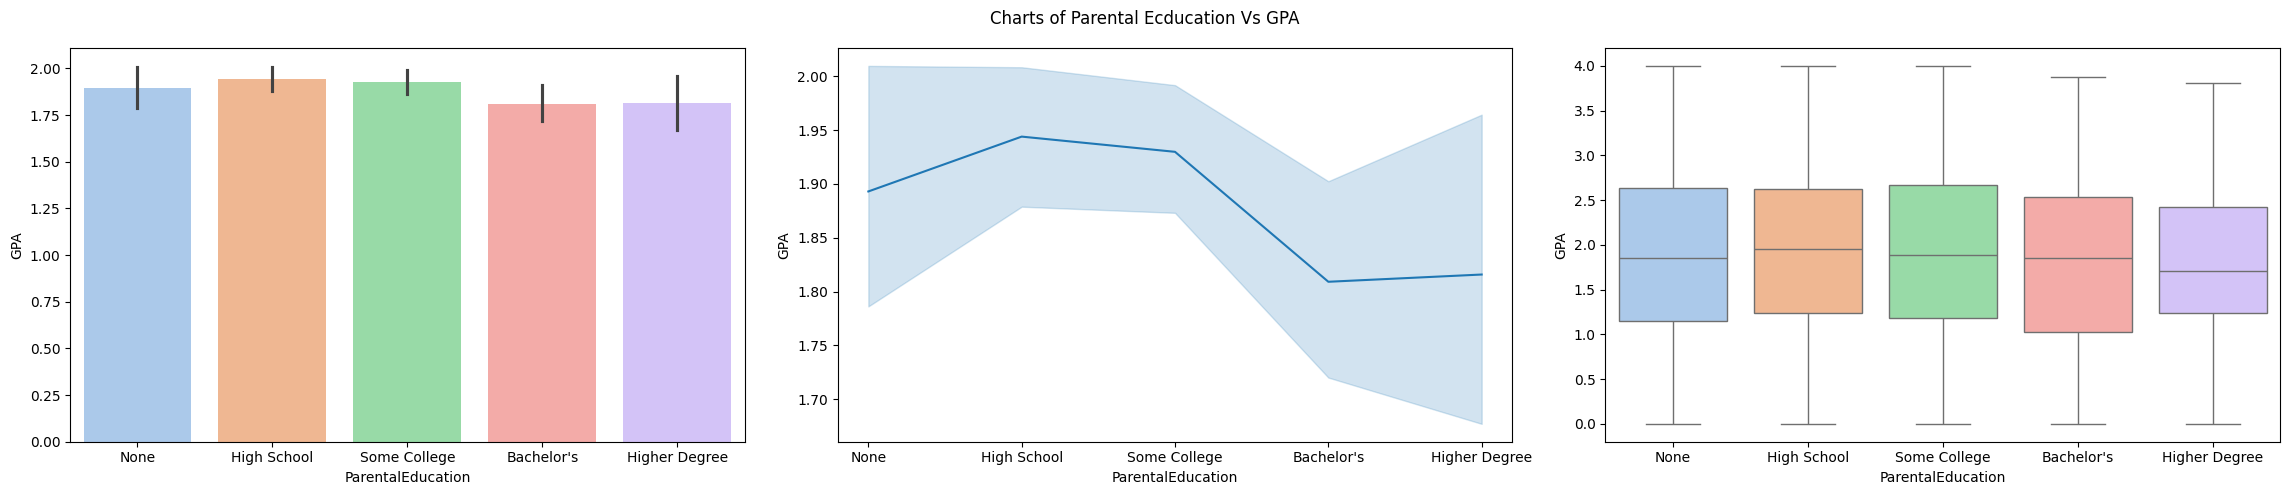

In [ ]:
fig, ax=plt.subplots(nrows=1 ,ncols=3 ,figsize=(23,5))
fig.suptitle('Charts of Parental Ecducation Vs GPA')

sns.barplot(data=df, x='ParentalEducation', y='GPA', ax=ax[0], palette='color')
sns.lineplot(data=df, x='ParentalEducation', y='GPA', ax=ax[1],palette='pastel')
sns.boxplot(data=df, x='ParentalEducation', y='GPA', ax=ax[2],palette='pastel')

plt.setp(ax, xticks=range(len(labels['ParentalEducation'])), xticklabels=labels['ParentalEducation'])
fig.tight_layout()
plt.show()

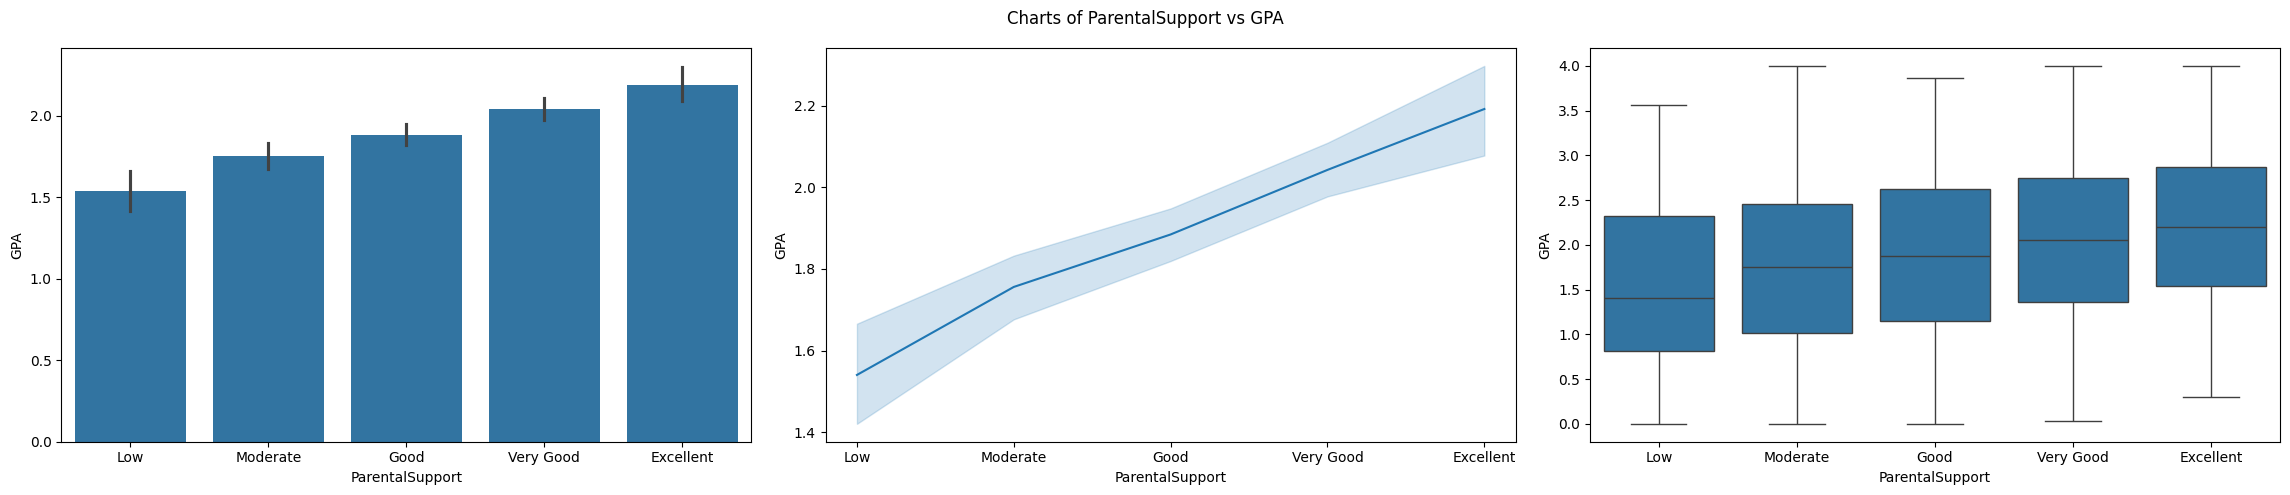

In [ ]:
fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(23,5))
fig.suptitle(f'Charts of ParentalSupport vs GPA')

sns.barplot(data=df, x='ParentalSupport', y='GPA', ax=ax[0])
sns.lineplot(data=df, x='ParentalSupport', y='GPA', ax=ax[1])
sns.boxplot(data=df, x='ParentalSupport', y='GPA', ax=ax[2])

plt.setp(ax, xticks=range(len(labels['ParentalSupport'])), xticklabels=labels['ParentalSupport'])
fig.tight_layout()
plt.show()

In [ ]:
fig, ax=plt.subplots(nrows=1,ncols=3,figsize=(20,5))
fig.suptitle('Chart of Grade vs GPA')

sns.barplot(data=df, x='GradeClass',y='GPA', palette='pastel', ax=ax[0])
sns.lineplot(data=df, x='GradeClass',y='GPA', palette='pastel', ax=ax[1])
sns.boxplot(data=df, x='GradeClass',y='GPA', palette='pastel', ax=ax[2])

plt.setp(ax, xticklabels=['A','B','C','D','F'])
fig.tight_layout()
plt.show()

<ipython-input-7-d10a5e5e67cf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gender', y='GPA', palette='pastel', ax=ax[0])
<ipython-input-7-d10a5e5e67cf>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='Gender', y='GPA', palette='pastel', ax=ax[1])
<ipython-input-7-d10a5e5e67cf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='GPA', palette='pastel', ax=ax[2])


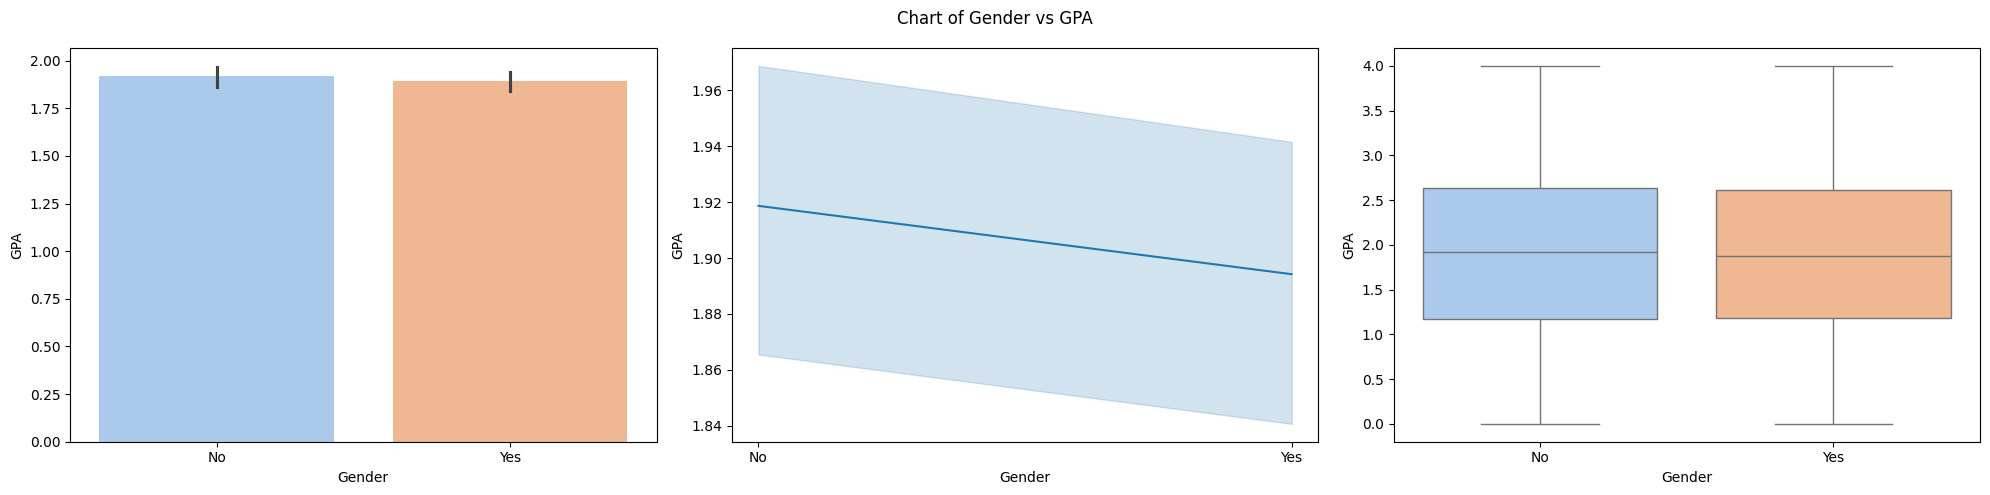

In [ ]:
fig, ax=plt.subplots(nrows=1, ncols=3, figsize=(20,5))
fig.suptitle('Chart of Gender vs GPA')

sns.barplot(data=df, x='Gender', y='GPA', palette='pastel', ax=ax[0])
sns.lineplot(data=df, x='Gender', y='GPA', palette='pastel', ax=ax[1])
sns.boxplot(data=df, x='Gender', y='GPA', palette='pastel', ax=ax[2])

plt.setp(ax, xticks=range(len(labels['Gender'])), xticklabels=labels['Gender'])
fig.tight_layout()
plt.show()


In [ ]:
#Correlation heat map
correlation=df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(correlation, annot=True, annot_kws={'size':8}, fmt='.1f', cbar=True, square=True, cmap='Blues')

Data Processing

In [ ]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
x=df.drop(columns=['StudentID','GradeClass'], axis=1)
y=df['GradeClass']

In [ ]:
scaler=StandardScaler()

scaler.fit(x.values)
scaled_data=scaler.fit_transform(x.values)
x_scaled=pd.DataFrame(scaled_data, columns=x.columns)
x_scaled.head(3)

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,0.472919,0.978492,-0.853391,0.253711,1.780336,-0.890822,1.522371,-0.108744,-0.788476,-0.660132,2.019544,-0.431866,1.118086
1,1.362944,-1.021981,-0.853391,-0.746087,0.997376,-1.717694,-0.656870,-0.999551,-0.788476,-0.660132,-0.495161,-0.431866,1.242374
2,-1.307132,-1.021981,1.091641,1.253509,-0.984045,1.353542,-0.656870,-0.108744,-0.788476,-0.660132,-0.495161,-0.431866,-1.960277


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1913, 13) (479, 13) (1913,) (479,)


Model Training

In [ ]:
models={'RandomForestClassifier':RandomForestClassifier(n_estimators=1000, max_depth=10, max_features='sqrt', random_state=42),
       'RandomForestRegressor':RandomForestRegressor(n_estimators=1000, max_depth=10, max_features='sqrt', random_state=42),
       'DecisionTreeClassifier':DecisionTreeClassifier(random_state=42),
       'LinearRegression':LinearRegression(),
       'LogisiticRegression':LogisticRegression(),
       'SupportVectorMachine':SVC(random_state=42)}

In [ ]:
def model_training(x_training, y_training):
  trained_models={}

  for name_model, model_train in models.items():
    model=model_train.fit(x_training.values, y_training)
    trained_models[name_model]= model
  return trained_models

In [ ]:
trained_model=model_training(x_train, y_train)
trained_model

{'RandomForestClassifier': RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=42),
 'RandomForestRegressor': RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=1000,
                       random_state=42),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
 'LinearRegression': LinearRegression(),
 'LogisiticRegression': LogisticRegression(),
 'SupportVectorMachine': SVC(random_state=42)}

Model Evaluation

In [ ]:
def model_accuracy(x_testing, y_testing):
  results=[]

  for name_test, model_test in trained_model.items():
    test_score=model_test.score(x_testing.values,y_testing)
    results.append({'Model':name_test,'Test Accuracy %':round((test_score*100),2)})

    results_df=pd.DataFrame(results)
  return results_df

In [ ]:
test_acc=model_accuracy(x_test, y_test)
test_acc

,Model,Test Accuracy %
0,RandomForestClassifier,90.81
1,RandomForestRegressor,76.50
2,DecisionTreeClassifier,83.30
3,LinearRegression,63.60
4,LogisiticRegression,74.53
5,SupportVectorMachine,77.87


<ipython-input-46-8b86a066422c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=test_acc, x='Model', y='Test Accuracy %', palette='pastel')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'RandomForestClassifier'),
  Text(1, 0, 'RandomForestRegressor'),
  Text(2, 0, 'DecisionTreeClassifier'),
  Text(3, 0, 'LinearRegression'),
  Text(4, 0, 'LogisiticRegression'),
  Text(5, 0, 'SupportVectorMachine')])

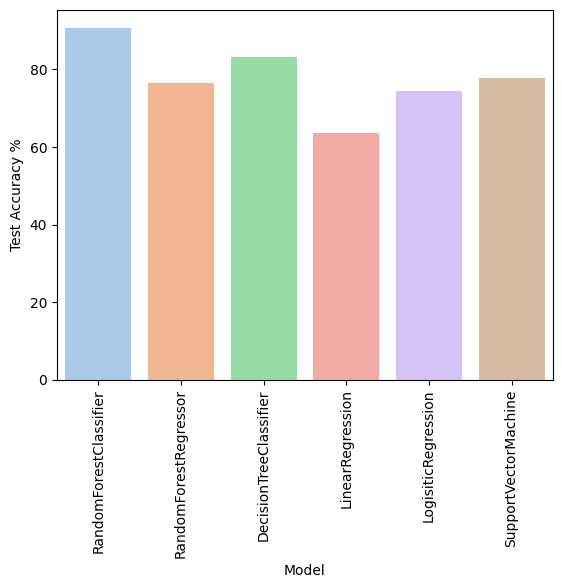

In [ ]:
# ploting the accuracy
sns.barplot(data=test_acc, x='Model', y='Test Accuracy %', palette='pastel')
plt.xticks(rotation=90)